<a href="https://colab.research.google.com/github/Voland24/MachineLearning-with-PyTorch-and-scikit-learn/blob/main/Chapter_2_ML_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Classifiers

This will be an overview of the various types of ML classifiers that are used today, implemented in sciki-learn.
We will look at algorithms like logistic regression, SVM, decision trees and knn.
We will also look at how we can use the scikit-learn api.

## Choosing an ML classifier

Important thing to note is the "no free lunch theorem", stating that no one classifier is the best one for every single possible scenario. It's common practice to compare the performance of several different learning algorithms in oreder to select the best possible one for the job. The factors could be the number of features, amount of noise in the data and whether or not the classes are linearly separable.
The computational performance of a model as well a sits predictive power will be greatly impacted by the underlying data.
General workflow of implementing a supervised learning algorithm would be:

1. Selecting features and labeled training examples
2. Choosing a performance metric
3. Choosing a learning algorithm and training the model
4. Evaluating the model's performance
5. Further tuning the model to its maximum performance

Here we will implemented the perceptron model, this time in scikit-learn. We will also use the same Iris dataset from the previous model, and only two features of the dataset.
This time, we will use all three classes present in the dataset.

Assing petal length and width of all 150 examples to the feature matrix X and their labels to the coresponding vector y/

In [2]:
from sklearn import datasets
import numpy as np
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target
print(f'Class labels {np.unique(y)}')

Class labels [0 1 2]


We can see that the three present classes setosa, versicolor and virgininca have numerical values. This is not only the convetion, but also helps with the computiation of the classifier, leaving a smaller memory footprint as well as helps prevent glitches in the process itself.

In order to evaluate the model's performance, we have to split the data into test(unseen) data and train(seen) data. The model will train on the train dataset and its performance will be used as if the on the real world data with the test data in question.

In this case, 0.3 or 30% of the dataset will be used for testing i.e. 45 examples and the res, 105 examples will be used for training.
Important to note, this function automatically shuffles the data before the split. If it didn't, all the examples of classes 0 and 1 would be in the training data and the test data would all be class 2. Random state seed is used to replicate the results if needed.
Stratify functionality enables us to specify that we want the train and test datasets to have the same ratio of classes internally as the original input dataset.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)

print(f'Labels ratio in y {np.bincount(y)}')
print(f'Lables ratio in y_train {np.bincount(y_train)}')
print(f'Labels ration in y_test {np.bincount(y_test)}')

Labels ratio in y [50 50 50]
Lables ratio in y_train [35 35 35]
Labels ration in y_test [15 15 15]


Many ML algorithms require feature scaling before they proceed. Gradient descnet works better and faster if this step is performed. Here we will achieve thiss using the scikitlearn api

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

The **fit** method will estimate the mean and the standard deviation for each feature in the passed dataset. **transform** will standardize all of the features in the dataset with the calculated mean and standard deviation.
Important to note that the test dataset is standardized with the same mean and standard deviation as the training one.

We can now train the Perceptron. Most classifiers support the OvA (One versus All) multi class method of classification by default in scikitlearn. This enables us to feed all three classes at once into the model.

In [6]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(eta0 = 0.1, random_state = 1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

random state argument ensures the shuffling of the dataset after each epoch to prevent cycles in learning.

We can now make predictions on the unseen Iris data

In [13]:
from sklearn.metrics import accuracy_score
y_pred = ppn.predict(X_test_std)
err = (y_test != y_pred).sum()
print(f'Number of misclassified examples: {err}')
print(f'Error rate is {(err / len(y_test)*100)}%')
print(f'The accuracy of the model is {accuracy_score(y_test, y_pred)}%')


Number of misclassified examples: 1
Error rate is 2.2222222222222223%
The accuracy of the model is 0.9777777777777777%


We can now visually inspect how well has the model separated the dataset.

In [14]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
def plot_decision_regions(X, y, classifier, test_idx=None,
 resolution=0.02):
 # setup marker generator and color map
 markers = ('o', 's', '^', 'v', '<')
 colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
 cmap = ListedColormap(colors[:len(np.unique(y))])
 # plot the decision surface
 x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
 x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
 xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
 np.arange(x2_min, x2_max, resolution))
 lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
 lab = lab.reshape(xx1.shape)
 plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
 plt.xlim(xx1.min(), xx1.max())
 plt.ylim(xx2.min(), xx2.max())
 # plot class examples
 for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
    y=X[y == cl, 1],
    alpha=0.8,
    c=colors[idx],
    marker=markers[idx],
    label=f'Class {cl}',
    edgecolor='black')
 if test_idx:
 # plot all examples
    X_test, y_test = X[test_idx, :], y[test_idx]
    plt.scatter(X_test[:, 0], X_test[:, 1],
    c='none', edgecolor='black', alpha=1.0,
    linewidth=1, marker='o',
    s=100, label='Test set')

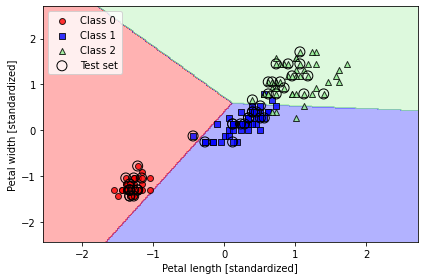

In [15]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,y=y_combined,classifier=ppn,test_idx=range(105, 150))
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Even though the classifiers does a pretty good job separating the classes, they cannot be perfectly separated by a linear separator i.e. a decision boundary. This was just an example even though the Perceptron isn't used for situations where there isn't a linear decision boundary. Instead we will use classifier that converge to a minimum of the loss function even if there isn't a linear decision boundary.

# Logistic regression

This an easy to implement classification algorithm used for linearly separable classes. It is a linear model for binary classification.
In cases of multiclass classification, we can use the One versus All technique or we can implement the multinomal logistic regression of softmax regression.

First thing to understand here is the term **odds**, which is basically the ratio of the probabilities of an event **P** happening or not i.e. p / (1 - p).
**p** here is the probability of the so called positive event i.e. the thing we are trying to predict and it's usually class label "1" so
p = p(y=1, x) or probability of y being 1 given the features **x**.

The **logit** function is simply defined as the logarithm of the odds or 
logit(p) = log( p / (1 - p))
This log here in the natural logarithm. The logith function takes inputs from 0 - 1 and scatters them all over the real number range.

Under the logistic model, we assume there is a linear relationship between the weighted inputs and the log-odds

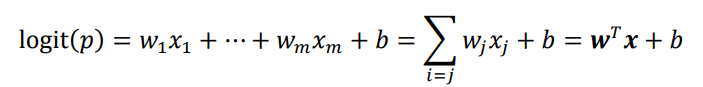


The logit function maps the probability of the given class appearing into the real number range, we can look at the invers function that mapls the real number range into the range [0,1] which we can interpret as the probability of the class appearing. This function is called the sigmoid function.

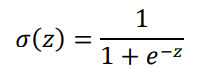

Here **z** is the weighted sum of the inputs, which we consider to be the log-odds.

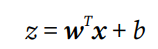

Here is how the sigmoid function looks like

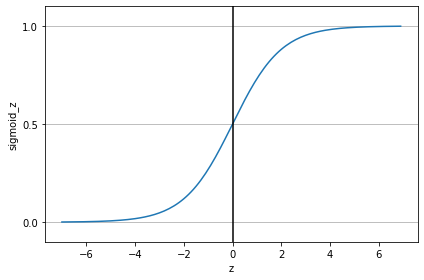

In [17]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))
z = np.arange(-7,7,0.1) # from -7 to 7 with a step of 0.1
sigma_z = sigmoid(z)
plt.plot(z, sigma_z)
plt.axvline(0.0, color = 'k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('sigmoid_z')
plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

As the z value approaces inf, the sigmoid approaches +1 since exp(-z) becomes very small for larger values. Similarly, if the z values go towards -inf, the sigmoid goes towards 0, since the denominator grows.
So, the sigmoid takes real number  inputs and maps them to the range [0,1] with a y intercept of 0.5.

The only difference between the Adaline model and the logistic regression one is that the activation function in the latter is the sigmoid function.

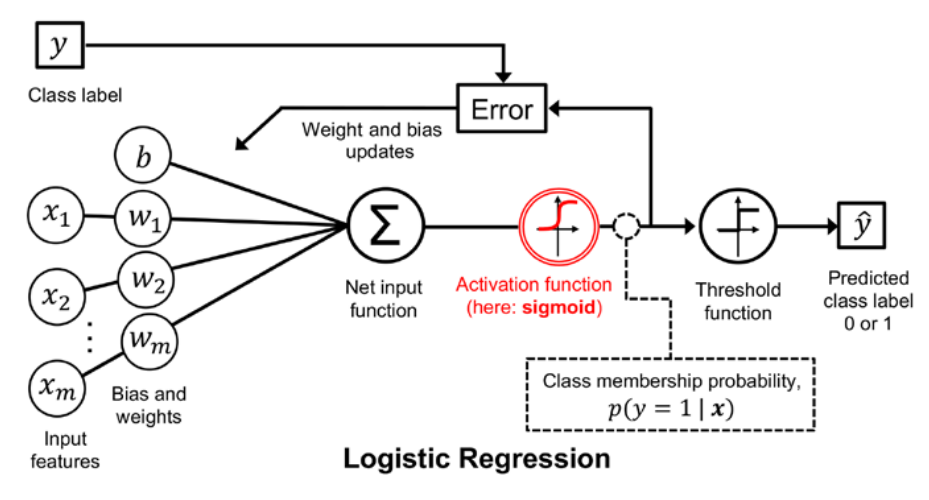

The output of the sigmoid is interpreted as the class probability of a given example. 
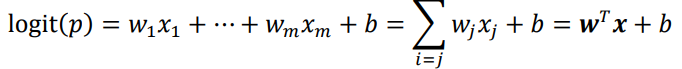

Meaning it's the probability of an example belonging to a specific class given its features **x** parametrized by the weights and the bias term.

We can apply a threshold function to the sigmoid output to get strict binary outputs and thus, a class label prediction

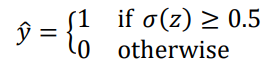

This, without the sigmoid function, means the following

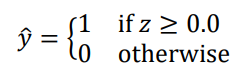

However, sometimes we want not only the specific class label but the confidence the model has in its prediction. We can use the sigmoid outputs and treat them as the model's confidence in a given prediction.